Workforce in NYC Parks

In [450]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
import matplotlib.pyplot as plt

import geopandas as gp
import shapely
from fiona.crs import from_epsg
%matplotlib inline

In [451]:
raw = pd.read_csv('Daily_Tasks_Park_Cleaning_Records.csv')

In [452]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778471 entries, 0 to 4778470
Data columns (total 35 columns):
row_id                    int64
gispropnum                object
omppropid                 object
gisobjid                  float64
route_id                  float64
off_route                 object
description               object
district                  object
sector                    object
sector_name               object
sector_desc               object
vehicle_number            float64
date_worked               object
start_time                object
end_time                  object
activity                  object
animal_waste              object
broken_glass              object
dumping                   object
graffiti                  object
medical_waste             object
napsw                     float64
ncpw                      float64
ncsa                      float64
npop                      float64
nnpw                      float64
ncrew                 

In [454]:
#clean na data
raw=raw.dropna(subset=['gispropnum'])
raw.reset_index(inplace= True)
raw = raw.drop(columns={'index'})

In [455]:
#setup borough and year
raw['borough'] = [raw['sector'][i][0] for i in range(0,len(raw))]
raw['year'] = [raw['fiscal_qtr'][i][0:4] for i in range(0,len(raw))]

In [456]:
raw.shape

(3780736, 37)

In [457]:
#cleaning inconsistent data
l=[]
for i in range(0,len(raw)):
    if raw['gispropnum'][i][0] != raw['borough'][i]:
        l.append(raw.index[i])

In [458]:
#number of data will be dropped
raw[raw.index.isin(l)].shape

(795, 37)

In [459]:
cleaned = raw.drop(l)

In [460]:
cleaned.shape

(3779941, 37)

How many parks in NYC?

In [461]:
cleaned['gispropnum'].nunique()

3467

Daily average of counts

In [462]:
cleaned['daily_task_id'].nunique() / cleaned['date_worked'].nunique() 

563.1814814814815

sum of hours daily

In [463]:
cleaned.groupby('date_worked')['nhours'].sum().describe()

count    1620.000000
mean     3013.058086
std       622.908599
min       311.540000
25%      2582.492500
50%      3040.605000
75%      3473.147500
max      4301.850000
Name: nhours, dtype: float64

Average hours per task

In [464]:
cleaned.groupby('daily_task_id')['nhours'].sum().describe()

count    912354.000000
mean          5.350066
std           3.258157
min           0.000000
25%           2.300000
50%           5.360000
75%           8.500000
max          38.640000
Name: nhours, dtype: float64

What is the proportion of parks in each borough?

In [465]:
cleaned.groupby('borough')['gispropnum'].nunique()

borough
B    878
M    585
Q    983
R    335
X    686
Name: gispropnum, dtype: int64

Average hours for each task by borough

In [466]:
cleaned.groupby('borough')['nhours'].mean()

borough
B    1.702718
M    1.158503
Q    1.543002
R    0.877236
X    0.828803
Name: nhours, dtype: float64

 Average number of workers each task by borough

In [467]:
cleaned.groupby('borough')['ncrew'].mean()

borough
B    2.918913
M    3.559398
Q    2.954750
R    3.049129
X    3.283450
Name: ncrew, dtype: float64

Average Daily # of Task by Borough

In [469]:
daily_task_by_borough = cleaned.groupby(['date_worked','borough']).count()['daily_task_id']

In [470]:
daily_task_by_borough = daily_task_by_borough.reset_index().rename(columns={'daily_task_id':'Average Daily Tasks'})

In [471]:
daily_task_by_borough['borough'] = daily_task_by_borough.borough.map(dict(M='Manhattan', B='Brooklyn', Q='Queens', R='Staten Island', X='Bronx'))

In [476]:
daily_task_by_borough.head()

,date_worked,borough,Average Daily Tasks
0,01/01/2016,Brooklyn,366
1,01/01/2016,Manhattan,292
2,01/01/2016,Queens,395
3,01/01/2016,Staten Island,188
4,01/01/2016,Bronx,288


Text(0.5, 0, '')

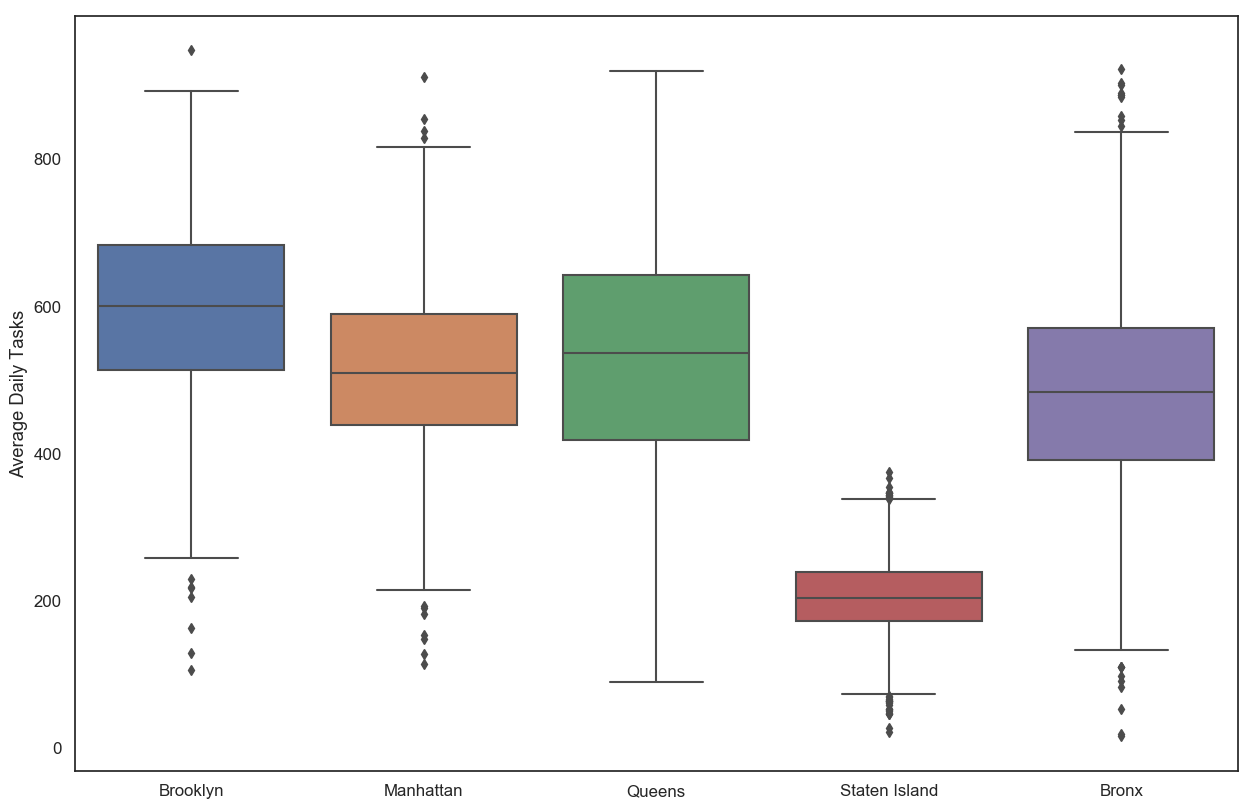

In [474]:
f, ax = plt.subplots(figsize=(15,10),dpi=100)
sns.boxplot(x='borough', y='Average Daily Tasks', data=daily_task_by_borough, ax=ax)
plt.xlabel('')

- What time do workers usually starts?
- Does the number of tasks increase yearly?
- Is there seanality or weekly trend?

In [237]:
cleaned['start_time'] = pd.to_datetime(cleaned['start_time'], errors = 'coerce')
cleaned['end_time'] = pd.to_datetime(cleaned['end_time'], errors = 'coerce')

In [238]:
cleaned['start_hour'] = cleaned.start_time.dt.hour
cleaned['end_hour'] = cleaned.end_time.dt.hour
cleaned['month'] = cleaned.start_time.dt.month
cleaned['week'] = cleaned.start_time.dt.week
cleaned['weekday'] = cleaned.start_time.dt.weekday

In [712]:
#time range covered by the dataset
cleaned['start_time'].sort_values()

1625902   2015-09-03 01:10:00
2229395   2015-09-03 01:40:00
2287685   2015-09-03 06:30:00
745044    2015-09-03 06:35:00
3754508   2015-09-03 06:40:00
3165009   2015-09-03 06:42:00
1923712   2015-09-03 06:45:00
1288084   2015-09-03 06:55:00
3692100   2015-09-03 07:00:00
3233096   2015-09-03 07:00:00
2668058   2015-09-03 07:00:00
52830     2015-09-03 07:00:00
1412137   2015-09-03 07:00:00
411958    2015-09-03 07:00:00
2801229   2015-09-03 07:00:00
3191514   2015-09-03 07:00:00
2769969   2015-09-03 07:01:00
1043538   2015-09-03 07:04:00
837130    2015-09-03 07:05:00
80639     2015-09-03 07:09:00
3062056   2015-09-03 07:15:00
282031    2015-09-03 07:15:00
950430    2015-09-03 07:18:00
525561    2015-09-03 07:20:00
3188604   2015-09-03 07:25:00
163777    2015-09-03 07:28:00
1955842   2015-09-03 07:28:00
3313084   2015-09-03 07:30:00
2064672   2015-09-03 07:30:00
2713673   2015-09-03 07:30:00
                  ...        
821176    2020-02-08 14:51:00
2081232   2020-02-08 14:51:00
329870    

In [393]:
staff_plot = cleaned[['napsw', 'ncpw', 'ncsa', 'npop', 'nnpw']].sum()
staff_plot = staff_plot / cleaned['ncrew'].sum() * 100
staff_plot

napsw    13.264590
ncpw     21.866693
ncsa      1.812976
npop     56.881558
nnpw      6.174182
dtype: float64

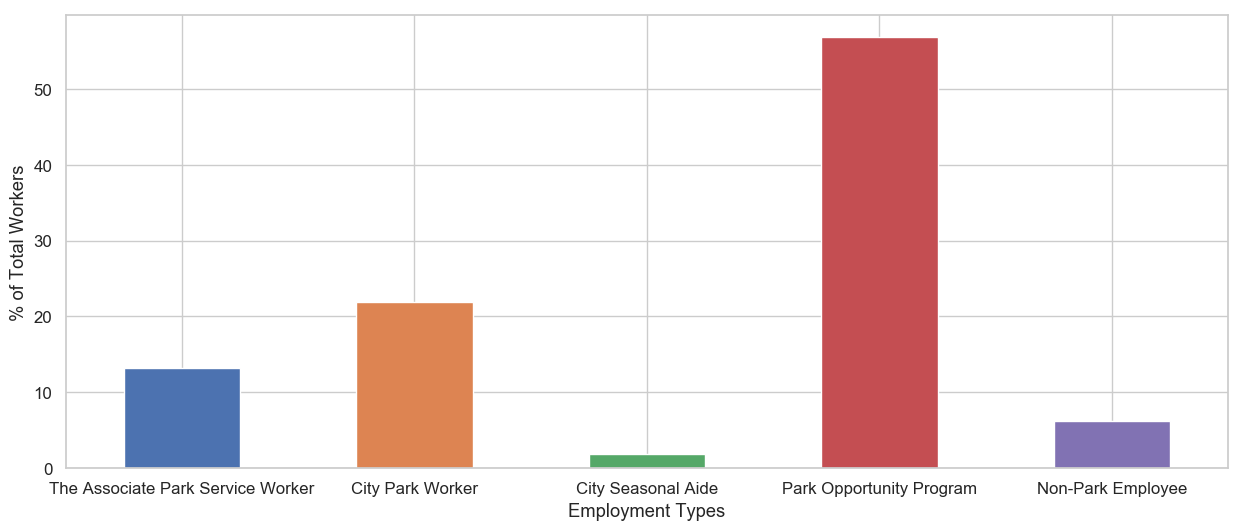

In [394]:
f, ax = plt.subplots(figsize=(15, 6),dpi=100)
staff_plot.plot(kind='bar', ax=ax)
plt.xticks(rotation=360)
plt.xticks(range(0,5), ('The Associate Park Service Worker','City Park Worker','City Seasonal Aide','Park Opportunity Program', 'Non-Park Employee'))
plt.xlabel('Employment Types')
plt.ylabel('% of Total Workers')
plt.show()

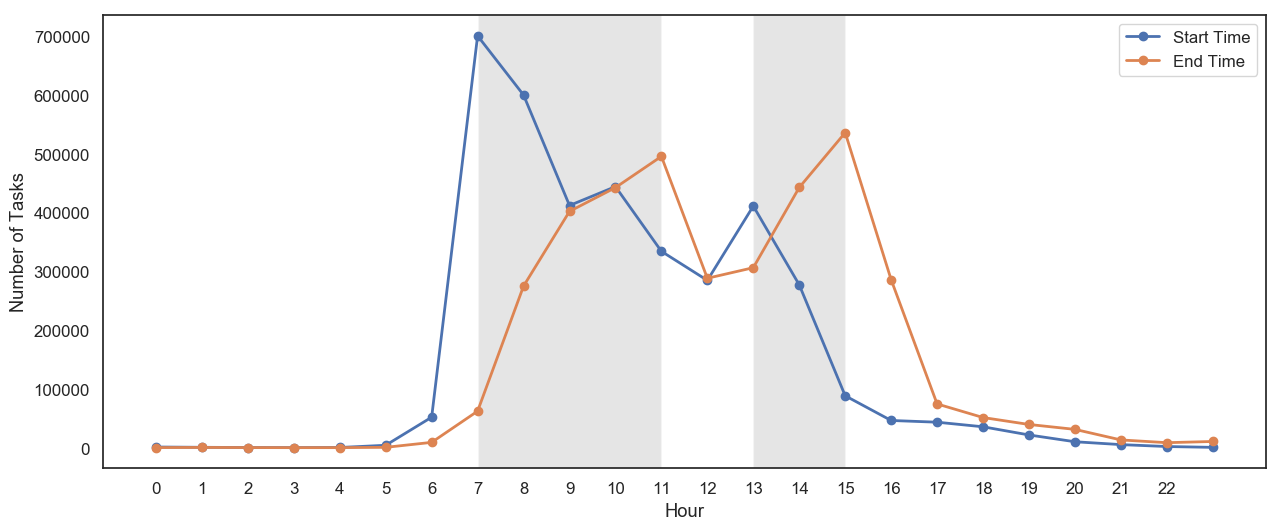

In [418]:
#What hours do workers usually starts?

cleaned_start_hour = cleaned.groupby('start_hour')['daily_task_id'].count()
cleaned_end_hour = cleaned.groupby('end_hour')['daily_task_id'].count()
                            
f, ax = plt.subplots(figsize=(15, 6),dpi=100)
cleaned_start_hour.plot(ax=ax,linewidth=2,marker='o', label='Start Time')
cleaned_end_hour.plot(ax=ax,linewidth=2,marker='o',label='End Time')
plt.xticks(np.arange(24), (range(0,23)))
plt.axvspan(7,11,facecolor='grey', alpha=0.2)
plt.axvspan(13,15,facecolor='grey', alpha=0.2)
ax.legend(loc='upper right')
plt.ylabel('Number of Tasks')
plt.xlabel('Hour')
plt.show()

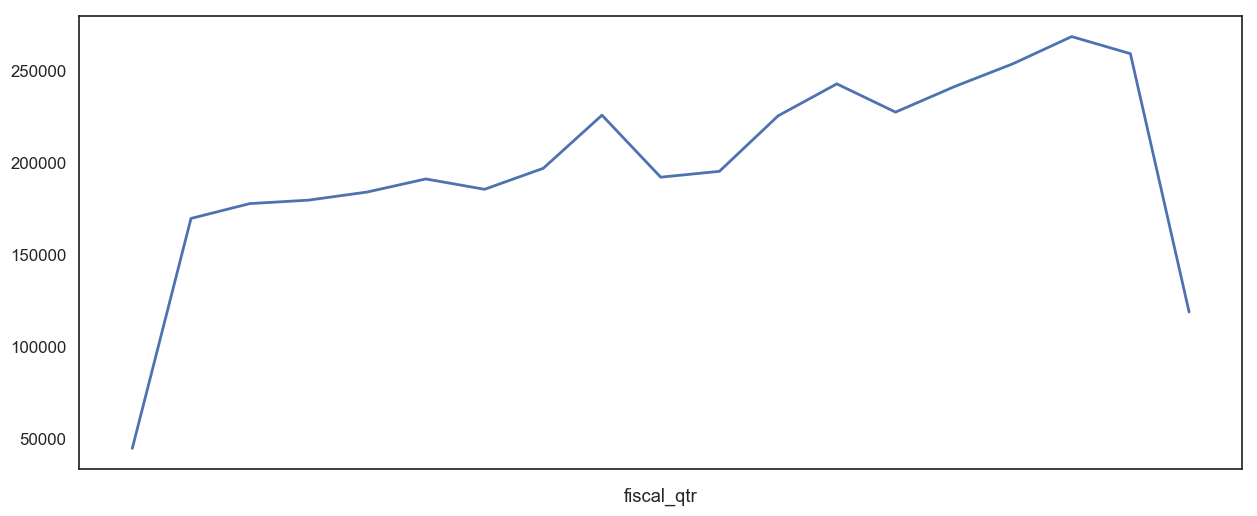

In [96]:
#Does the number of tasks increase quaterly?

cleaned_qtr = cleaned.groupby('fiscal_qtr').count()['row_id']
                            
f, ax = plt.subplots(figsize=(15, 6),dpi=100)
cleaned_qtr.plot(ax=ax,linewidth=2)
plt.show()

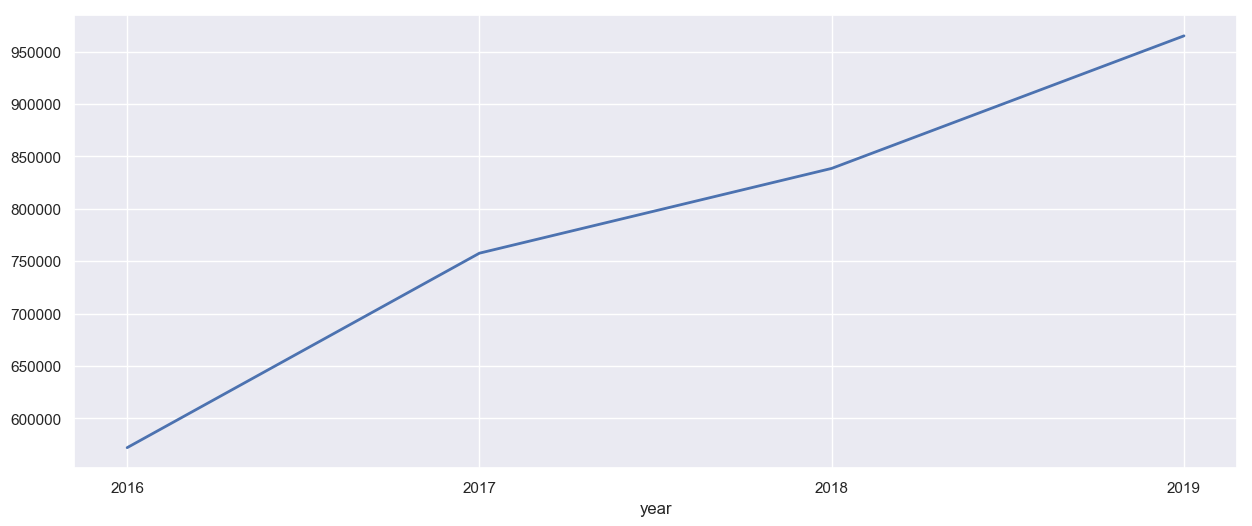

In [754]:
#Does the number of tasks increase yearly?
year = ['2016','2017','2018','2019']

cleaned_year = cleaned[cleaned['year'].isin(year)]
cleaned_year = cleaned_year.groupby('year')['row_id'].count()
                            
f, ax = plt.subplots(figsize=(15, 6),dpi=100)
cleaned_year.plot(ax=ax,linewidth=2)
plt.xticks(np.arange(4), ('2016','2017','2018','2019'))
plt.show()



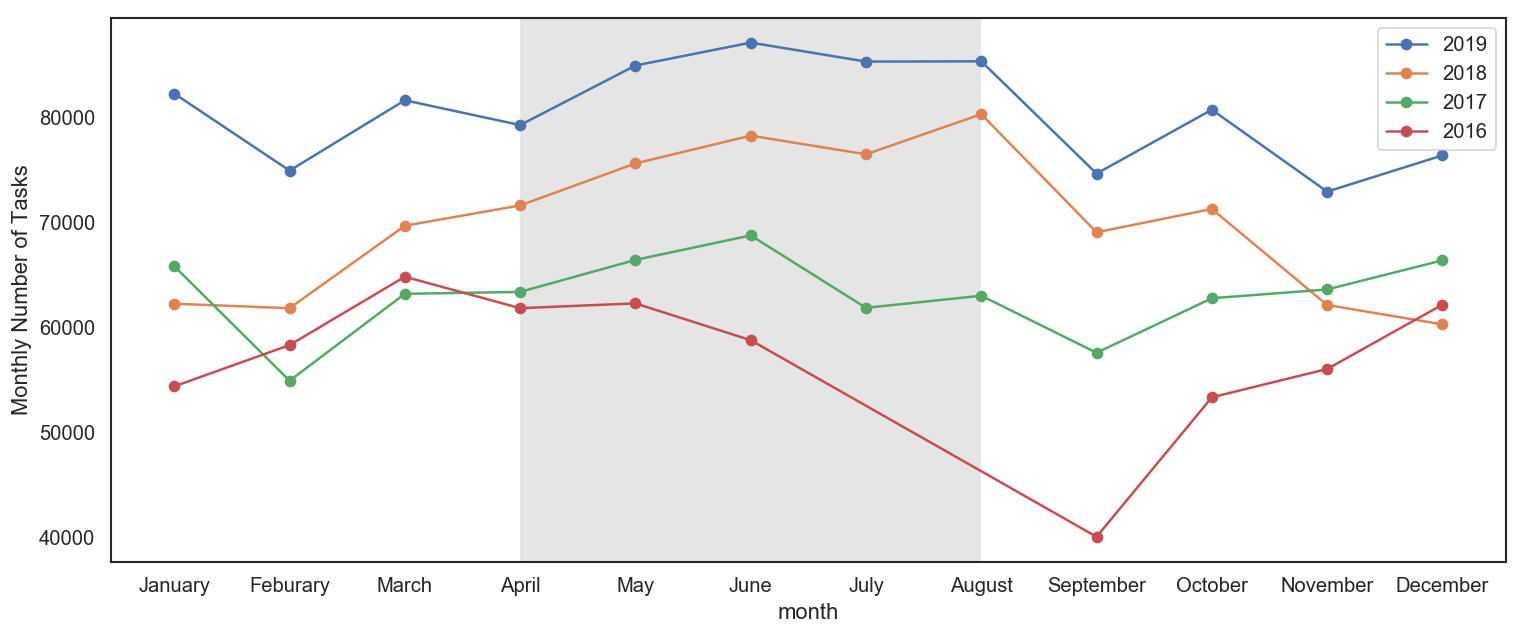

In [410]:
#Is there seanality?

cleaned_2019_month = cleaned[cleaned['year'] == '2019'].groupby('month')['daily_task_id'].count()
cleaned_2018_month = cleaned[cleaned['year'] == '2018'].groupby('month')['daily_task_id'].count()
cleaned_2017_month = cleaned[cleaned['year'] == '2017'].groupby('month')['daily_task_id'].count()
cleaned_2016_month = cleaned[cleaned['year'] == '2016'].groupby('month')['daily_task_id'].count()

                            
f, ax = plt.subplots(figsize=(15, 6),dpi=120)
cleaned_2019_month.plot(ax=ax,linewidth=1.5,label='2019',marker='o')
cleaned_2018_month.plot(ax=ax,linewidth=1.5,label='2018',marker='o')
cleaned_2017_month.plot(ax=ax,linewidth=1.5,label='2017',marker='o')
cleaned_2016_month.plot(ax=ax,linewidth=1.5,label='2016',marker='o')

plt.xticks(np.arange(13), ('','January','Feburary','March','April','May','June','July','August','September','October','November', 'December'))
ax.legend(loc='upper right')
plt.ylabel('Monthly Number of Tasks')
plt.axvspan(4,8,facecolor='grey', alpha=0.2)

plt.show()

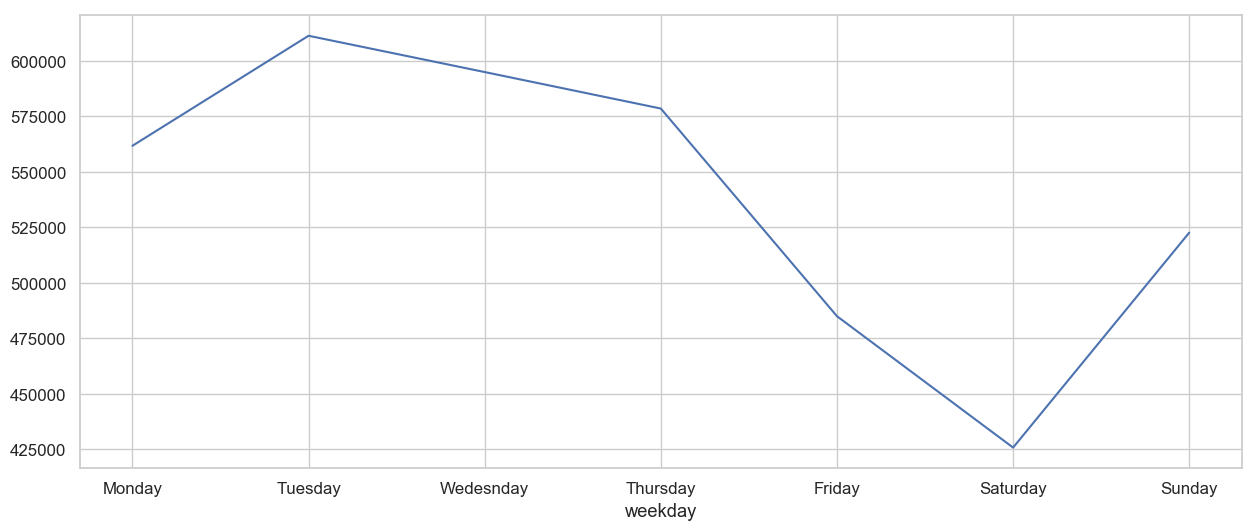

In [298]:
#Is there weekly trend?

cleaned_weekday = cleaned.groupby('weekday')['daily_task_id'].count()
                            
f, ax = plt.subplots(figsize=(15, 6),dpi=100)
cleaned_weekday.plot(ax=ax,linewidth=1.5)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

What is the ratio of non-park employees for each borough?

In [234]:
cleaned.groupby('borough')['nnpw'].sum() / cleaned.groupby('borough')['ncrew'].sum()

borough
B    0.045101
M    0.178010
Q    0.012590
R    0.000787
X    0.018621
dtype: float64

Calculate the Ratio of nnpw/ncrew per omppropid

In [195]:
npw_ratio_by_district = pd.DataFrame(cleaned.groupby(['district'])['nnpw'].sum() / cleaned.groupby(['district'])['ncrew'].sum()).reset_index().rename(columns={0:'nnpw/ncrew'})

In [248]:
npw_ratio_by_omp = pd.DataFrame(cleaned.groupby(['omppropid'])['nnpw'].sum() / cleaned.groupby(['omppropid'])['ncrew'].sum()).reset_index().rename(columns={0:'nnpw/ncrew'})

In [249]:
npw_ratio_by_omp.shape

(4367, 2)

In [250]:
park_description = cleaned[['omppropid','description']]

In [251]:
npw_ratio_by_omp = npw_ratio_by_omp.merge(park_description, on='omppropid',how='inner').drop_duplicates()

In [252]:
npw_ratio_by_omp.sort_values(by='nnpw/ncrew',ascending =False).head(10)

,omppropid,nnpw/ncrew,description
1762243,MZ428,1.000000,MZ428 | Broadway Pedestrian Refuge
1762244,MZ429,1.000000,MZ429 | Broadway Pedestrian Refuge
1763020,MZ430,1.000000,MZ430 | Broadway Pedestrian Refuge
1055687,M036,0.998516,M036 | Herald Square
1049125,M032,0.998236,M032 | Greeley Square Park
980791,M008,0.998043,M008 | Bryant Park
1295566,M093,0.997442,M101 | Worth Square
1294300,M093,0.997442,M093 | Father Duffy Square
1671058,MZ01,0.992308,MZ01 | Park Avenue Malls
1331780,M101,0.962595,M101 | Worth Square


Visualize the non-park employee ratio on the map

In [239]:
#import park property map
parkprop = gpd.read_file('Parks Properties/geo_export_d5800ab2-dbd7-4d22-9600-5adf746ad525.shp')
parkprop.to_crs(epsg=2263, inplace=True)

In [156]:
#import park district map
istrict = gpd.read_file('NYC Parks Districts/geo_export_ceb79d9c-dff7-4bef-b1de-5666c0459784.shp')
district = district.rename(columns={'parkdistri':'district'})
district.to_crs(epsg=2263, inplace=True)

(905315.5077425186, 1075099.984478667, 111855.4101318807, 280510.4522174577)

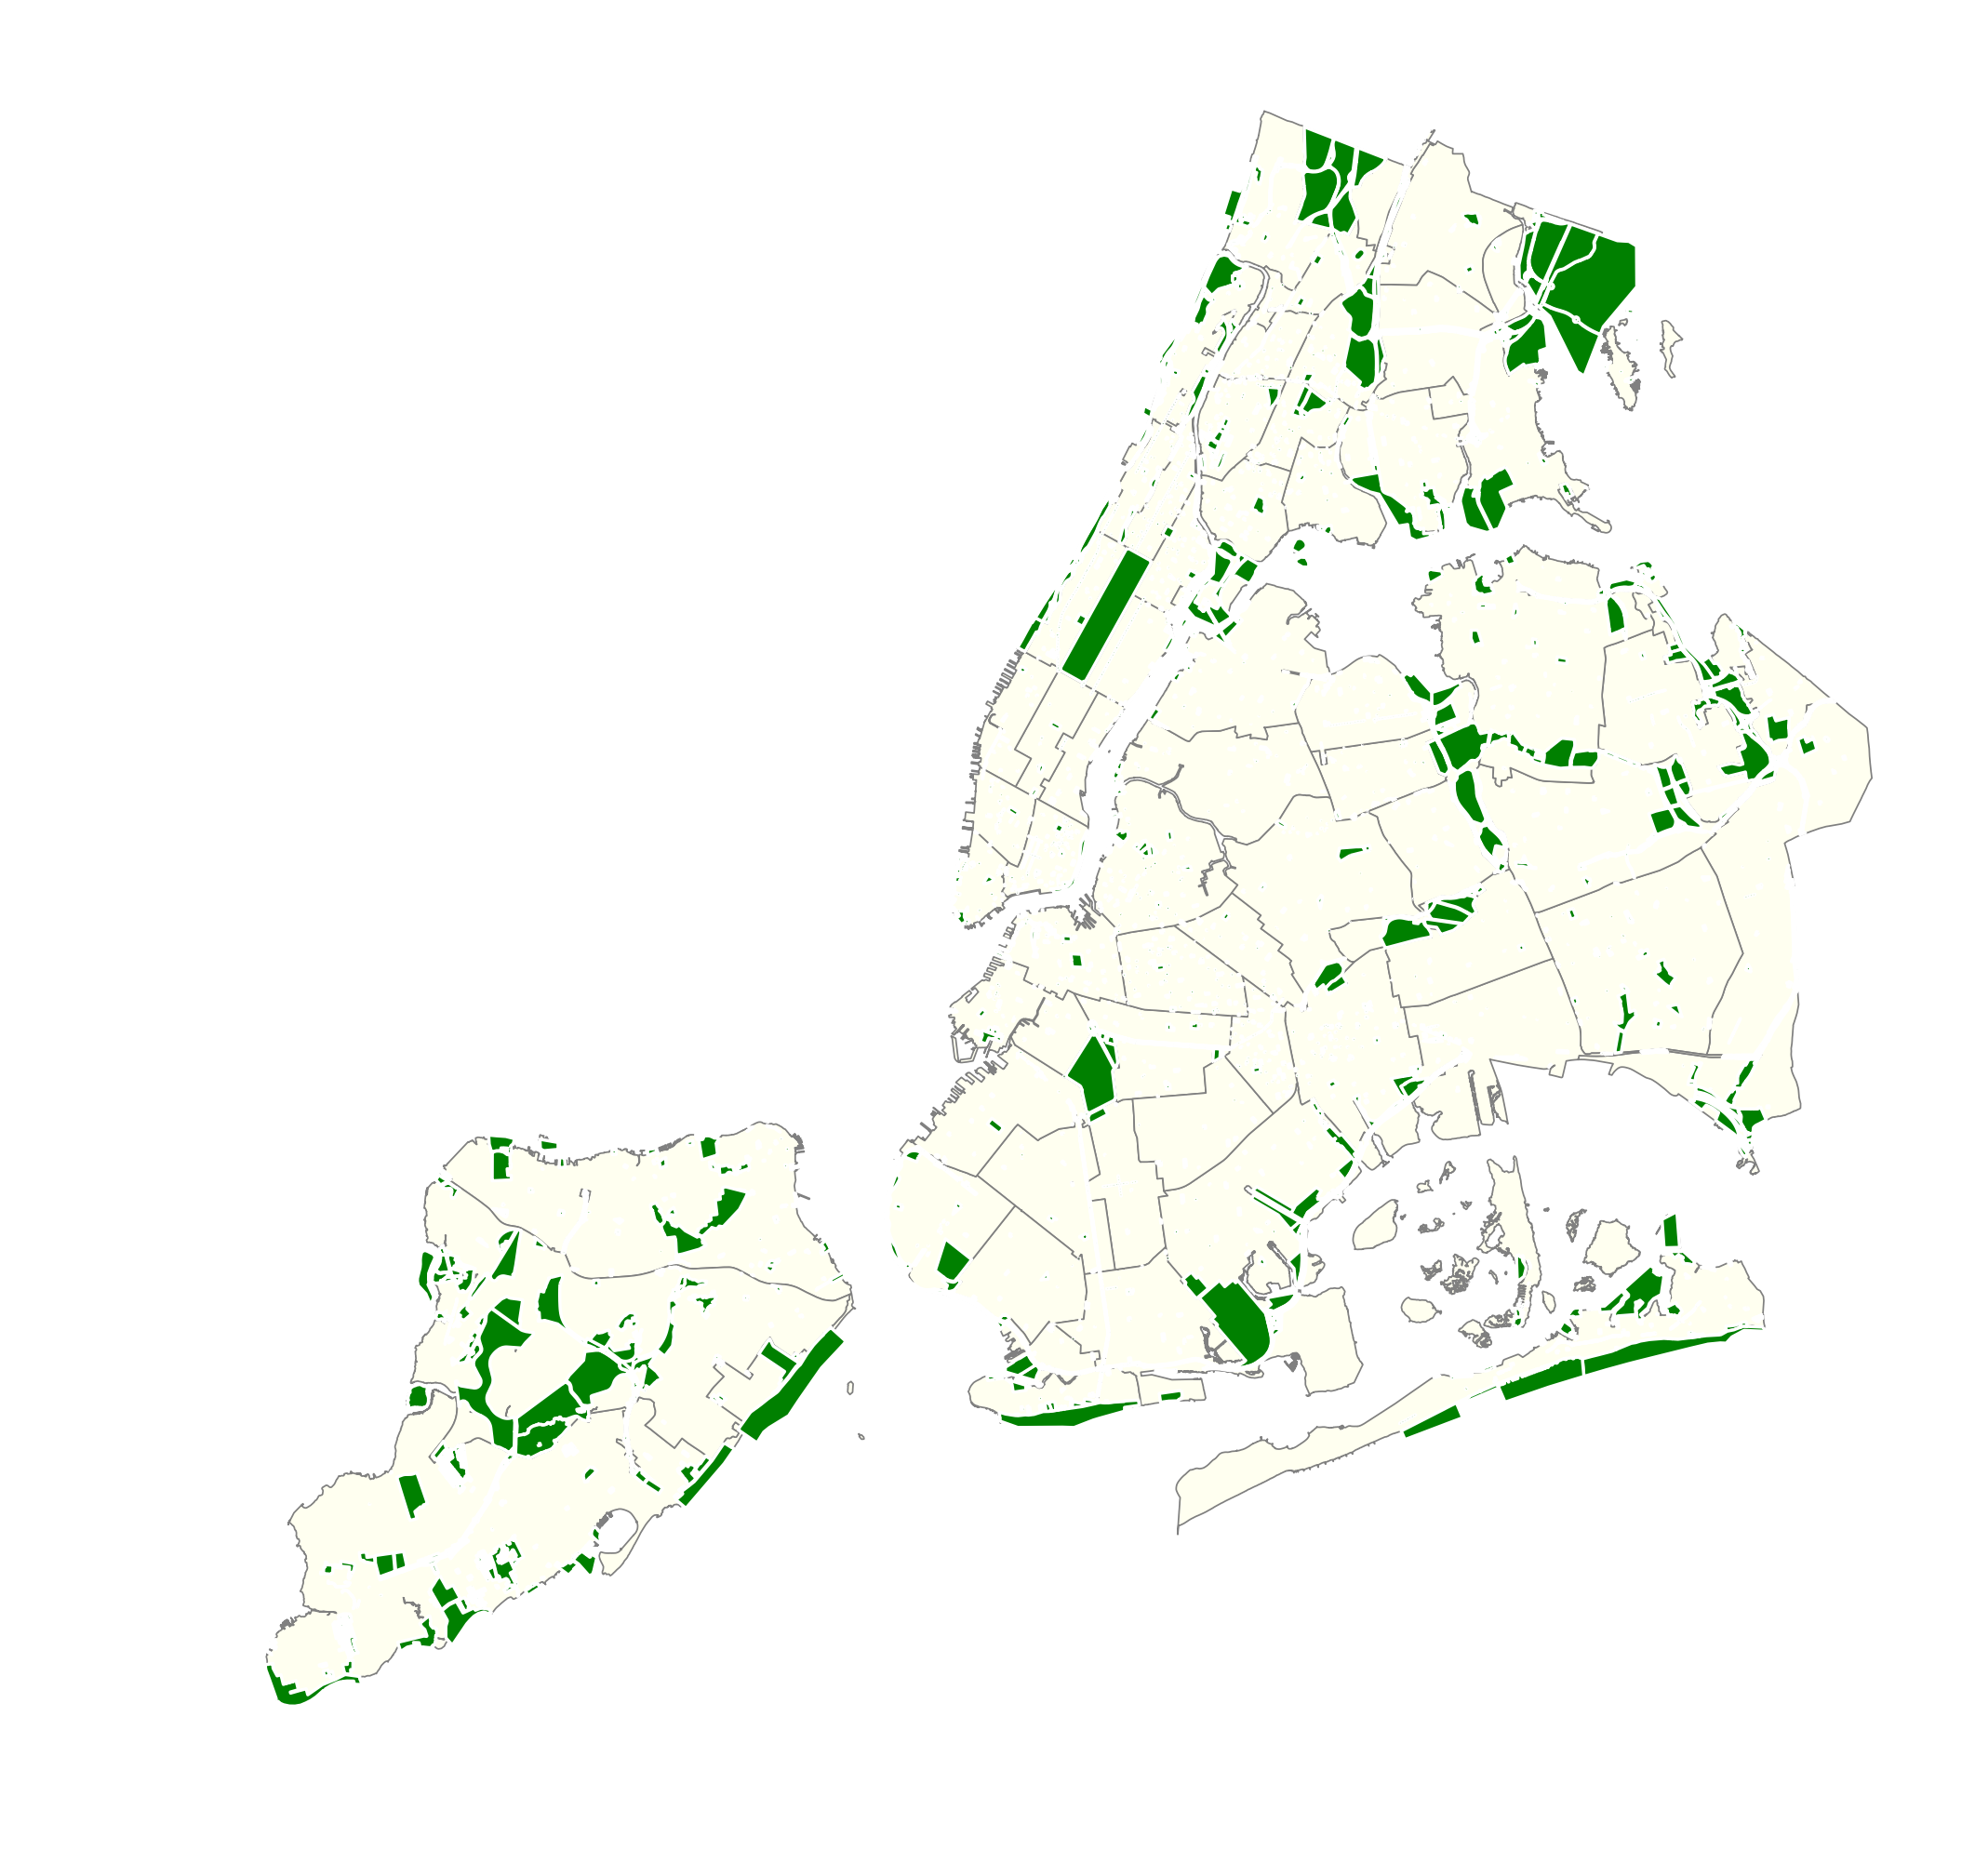

In [477]:
f, ax = plt.subplots(figsize=(20, 10),dpi=250)
district.plot(ax=ax,facecolor='ivory', legend=True, edgecolor='grey', linewidth=0.5)
parkprop.plot(ax=ax,facecolor='green')
ax.axis('off')

In [533]:
npw_ratio_by_district_map = district.merge(npw_ratio_by_district, on='district',how='outer')
npw_ratio_by_district_map.dropna(inplace=True)

(905463.8282135895, 1075092.9215990922, 112490.39946229302, 280480.2146302952)

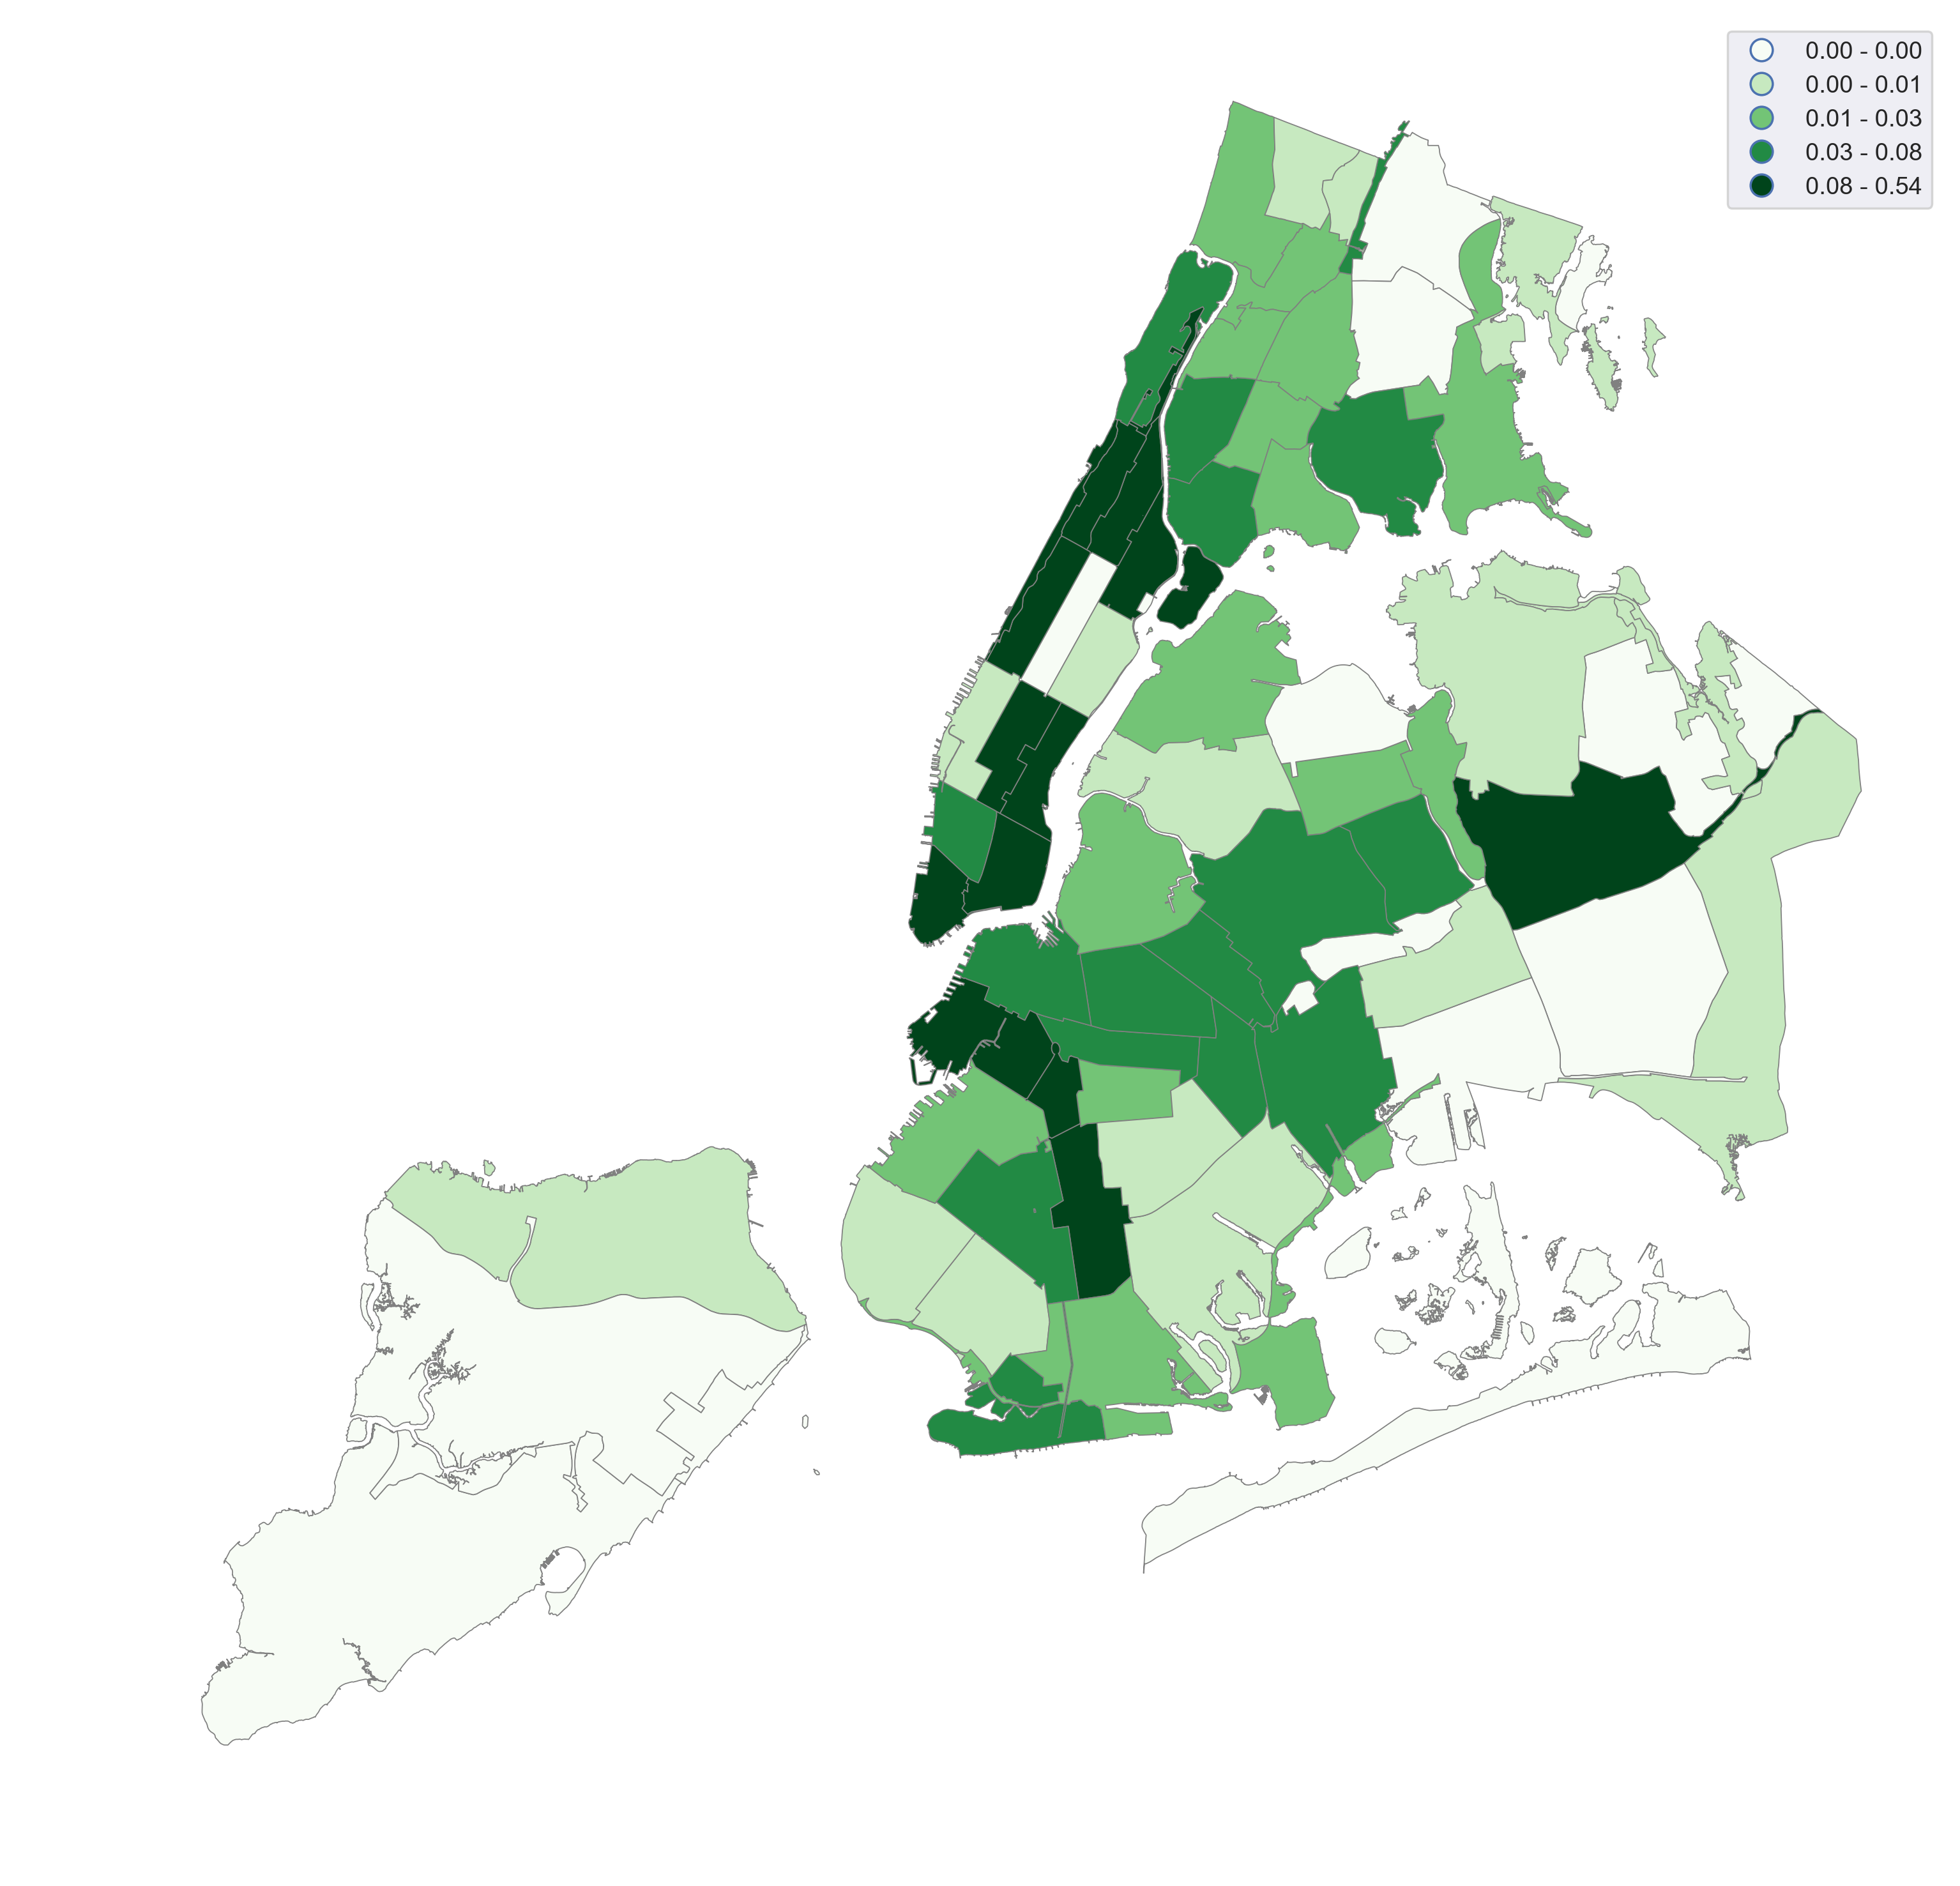

In [673]:
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
npw_ratio_by_district_map.plot(ax=ax,column = 'nnpw/ncrew',scheme ='quantiles',cmap='Greens',legend=True, 
                            linewidth=0.5, edgecolor='grey')
ax.axis('off')

In [259]:
npw_ratio_by_omp_map = npw_ratio_by_omp_map.rename(columns={'signname':'Park','nnpw/ncrew':'% of non-park workers'})

In [260]:
npw_ratio_by_omp_map.sort_values(by='% of non-park workers',ascending=False)[['Park','% of non-park workers']].head(10)

,Park,% of non-park workers
934,Herald Square,0.998516
256,Greeley Square Park,0.998236
229,Bryant Park,0.998043
582,Worth Square,0.962595
1274,Madison Square Park,0.893733
30,The Public Theater,0.840909
1657,9th St Community Garden Park,0.750000
825,Liz Christy Garden,0.500000
1607,Tompkins Square Park,0.457976
266,Stuyvesant Square,0.449996


Count activites involving animal waste by distrinct

In [433]:
cleaned['animal_waste_0'] = cleaned.animal_waste.map(dict(Yes=1, No=0))
cleaned['broken_glass_0'] = cleaned.broken_glass.map(dict(Yes=1, No=0))
cleaned['dumping_0'] = cleaned.dumping.map(dict(Yes=1, No=0))
cleaned['graffiti_0'] = cleaned.graffiti.map(dict(Yes=1, No=0))
cleaned['medical_waste_0'] = cleaned.medical_waste.map(dict(Yes=1, No=0))

In [434]:
animal_waste_by_district = pd.DataFrame(cleaned.groupby('district')['animal_waste_0'].sum() / cleaned.groupby('district')['animal_waste_0'].count())
broken_glass_by_district = pd.DataFrame(cleaned.groupby('district')['broken_glass_0'].sum() / cleaned.groupby('district')['broken_glass_0'].count())
dumping_by_district = pd.DataFrame(cleaned.groupby('district')['dumping_0'].sum() / cleaned.groupby('district')['dumping_0'].count())
graffiti_by_district = pd.DataFrame(cleaned.groupby('district')['graffiti_0'].sum() / cleaned.groupby('district')['graffiti_0'].count())
medical_waste_by_district = pd.DataFrame(cleaned.groupby('district')['medical_waste_0'].sum() / cleaned.groupby('district')['medical_waste_0'].count())

In [435]:
content_by_district = pd.concat([animal_waste_by_district,broken_glass_by_district,dumping_by_district,graffiti_by_district,medical_waste_by_district],axis=1).reset_index()


Visualize content by district

In [436]:
content_by_district_map = district.merge(content_by_district, on='district',how='outer')

In [437]:
content_by_district_map = content_by_district_map.dropna()

(905463.8282135896, 1075092.9215990922, 112490.39946229302, 280480.21463029523)

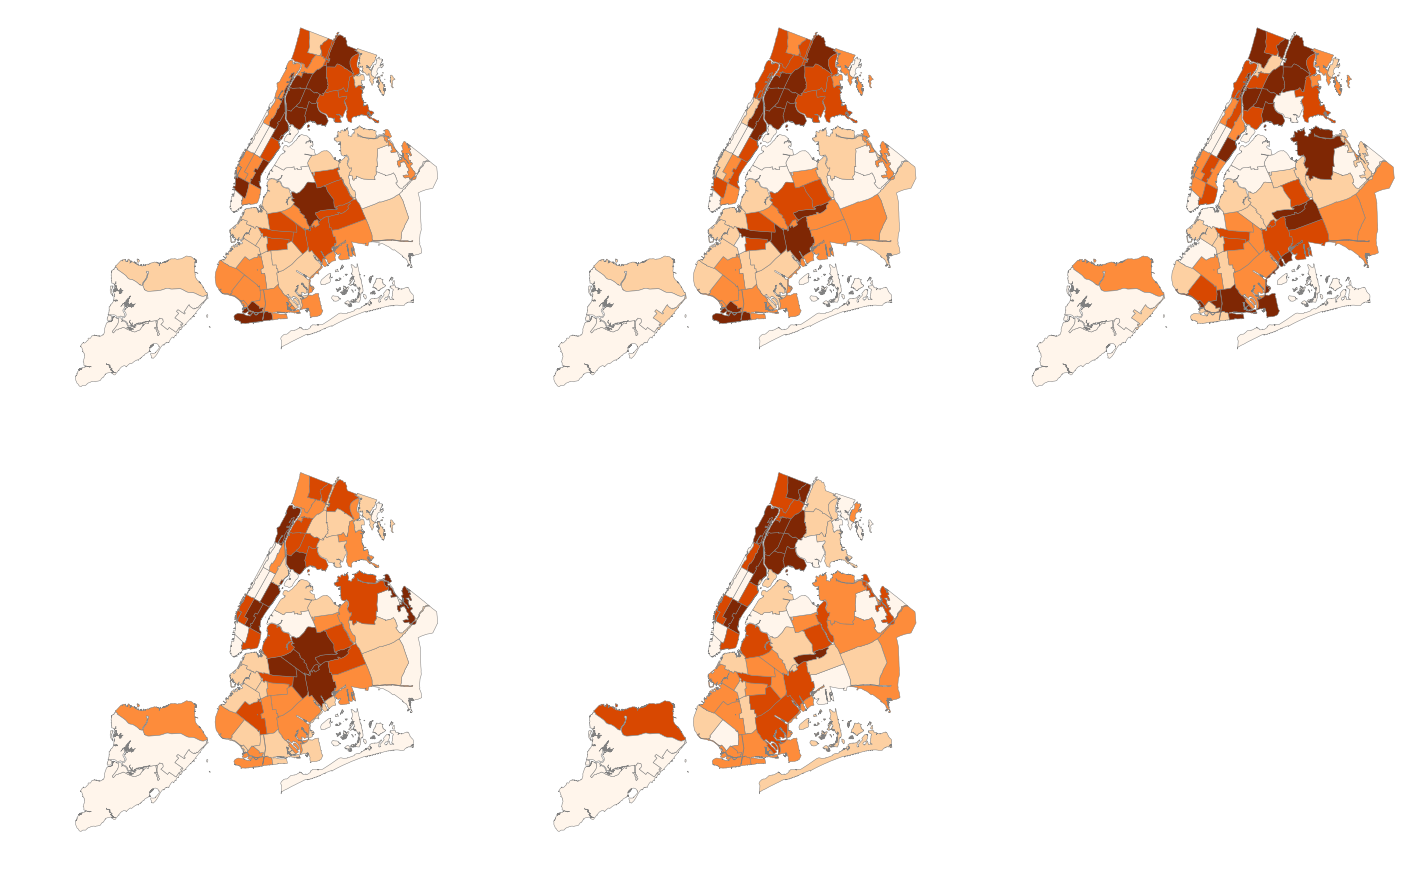

In [438]:
fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(261)
content_by_district_map.plot(ax=ax,column = 'animal_waste_0',scheme ='quantiles',cmap='Oranges',legend=False, 
                            linewidth=0.5, edgecolor='grey')
ax.axis('off')

ax = fig.add_subplot(262)
content_by_district_map.plot(ax=ax,column = 'broken_glass_0',scheme ='quantiles',cmap='Oranges',legend=False, 
                            linewidth=0.5, edgecolor='grey')
ax.axis('off')

ax = fig.add_subplot(263)
content_by_district_map.plot(ax=ax,column = 'dumping_0',scheme ='quantiles',cmap='Oranges',legend=False, 
                            linewidth=0.5, edgecolor='grey')
ax.axis('off')

ax = fig.add_subplot(161)
content_by_district_map.plot(ax=ax,column = 'graffiti_0',scheme ='quantiles',cmap='Oranges',legend=False, 
                            linewidth=0.5, edgecolor='grey')
ax.axis('off')

ax = fig.add_subplot(162)
content_by_district_map.plot(ax=ax,column = 'medical_waste_0',scheme ='quantiles',cmap='Oranges',legend=False, 
                            linewidth=0.5, edgecolor='grey')
ax.axis('off')

(905463.8282135895, 1075092.9215990922, 112490.39946229302, 280480.2146302952)

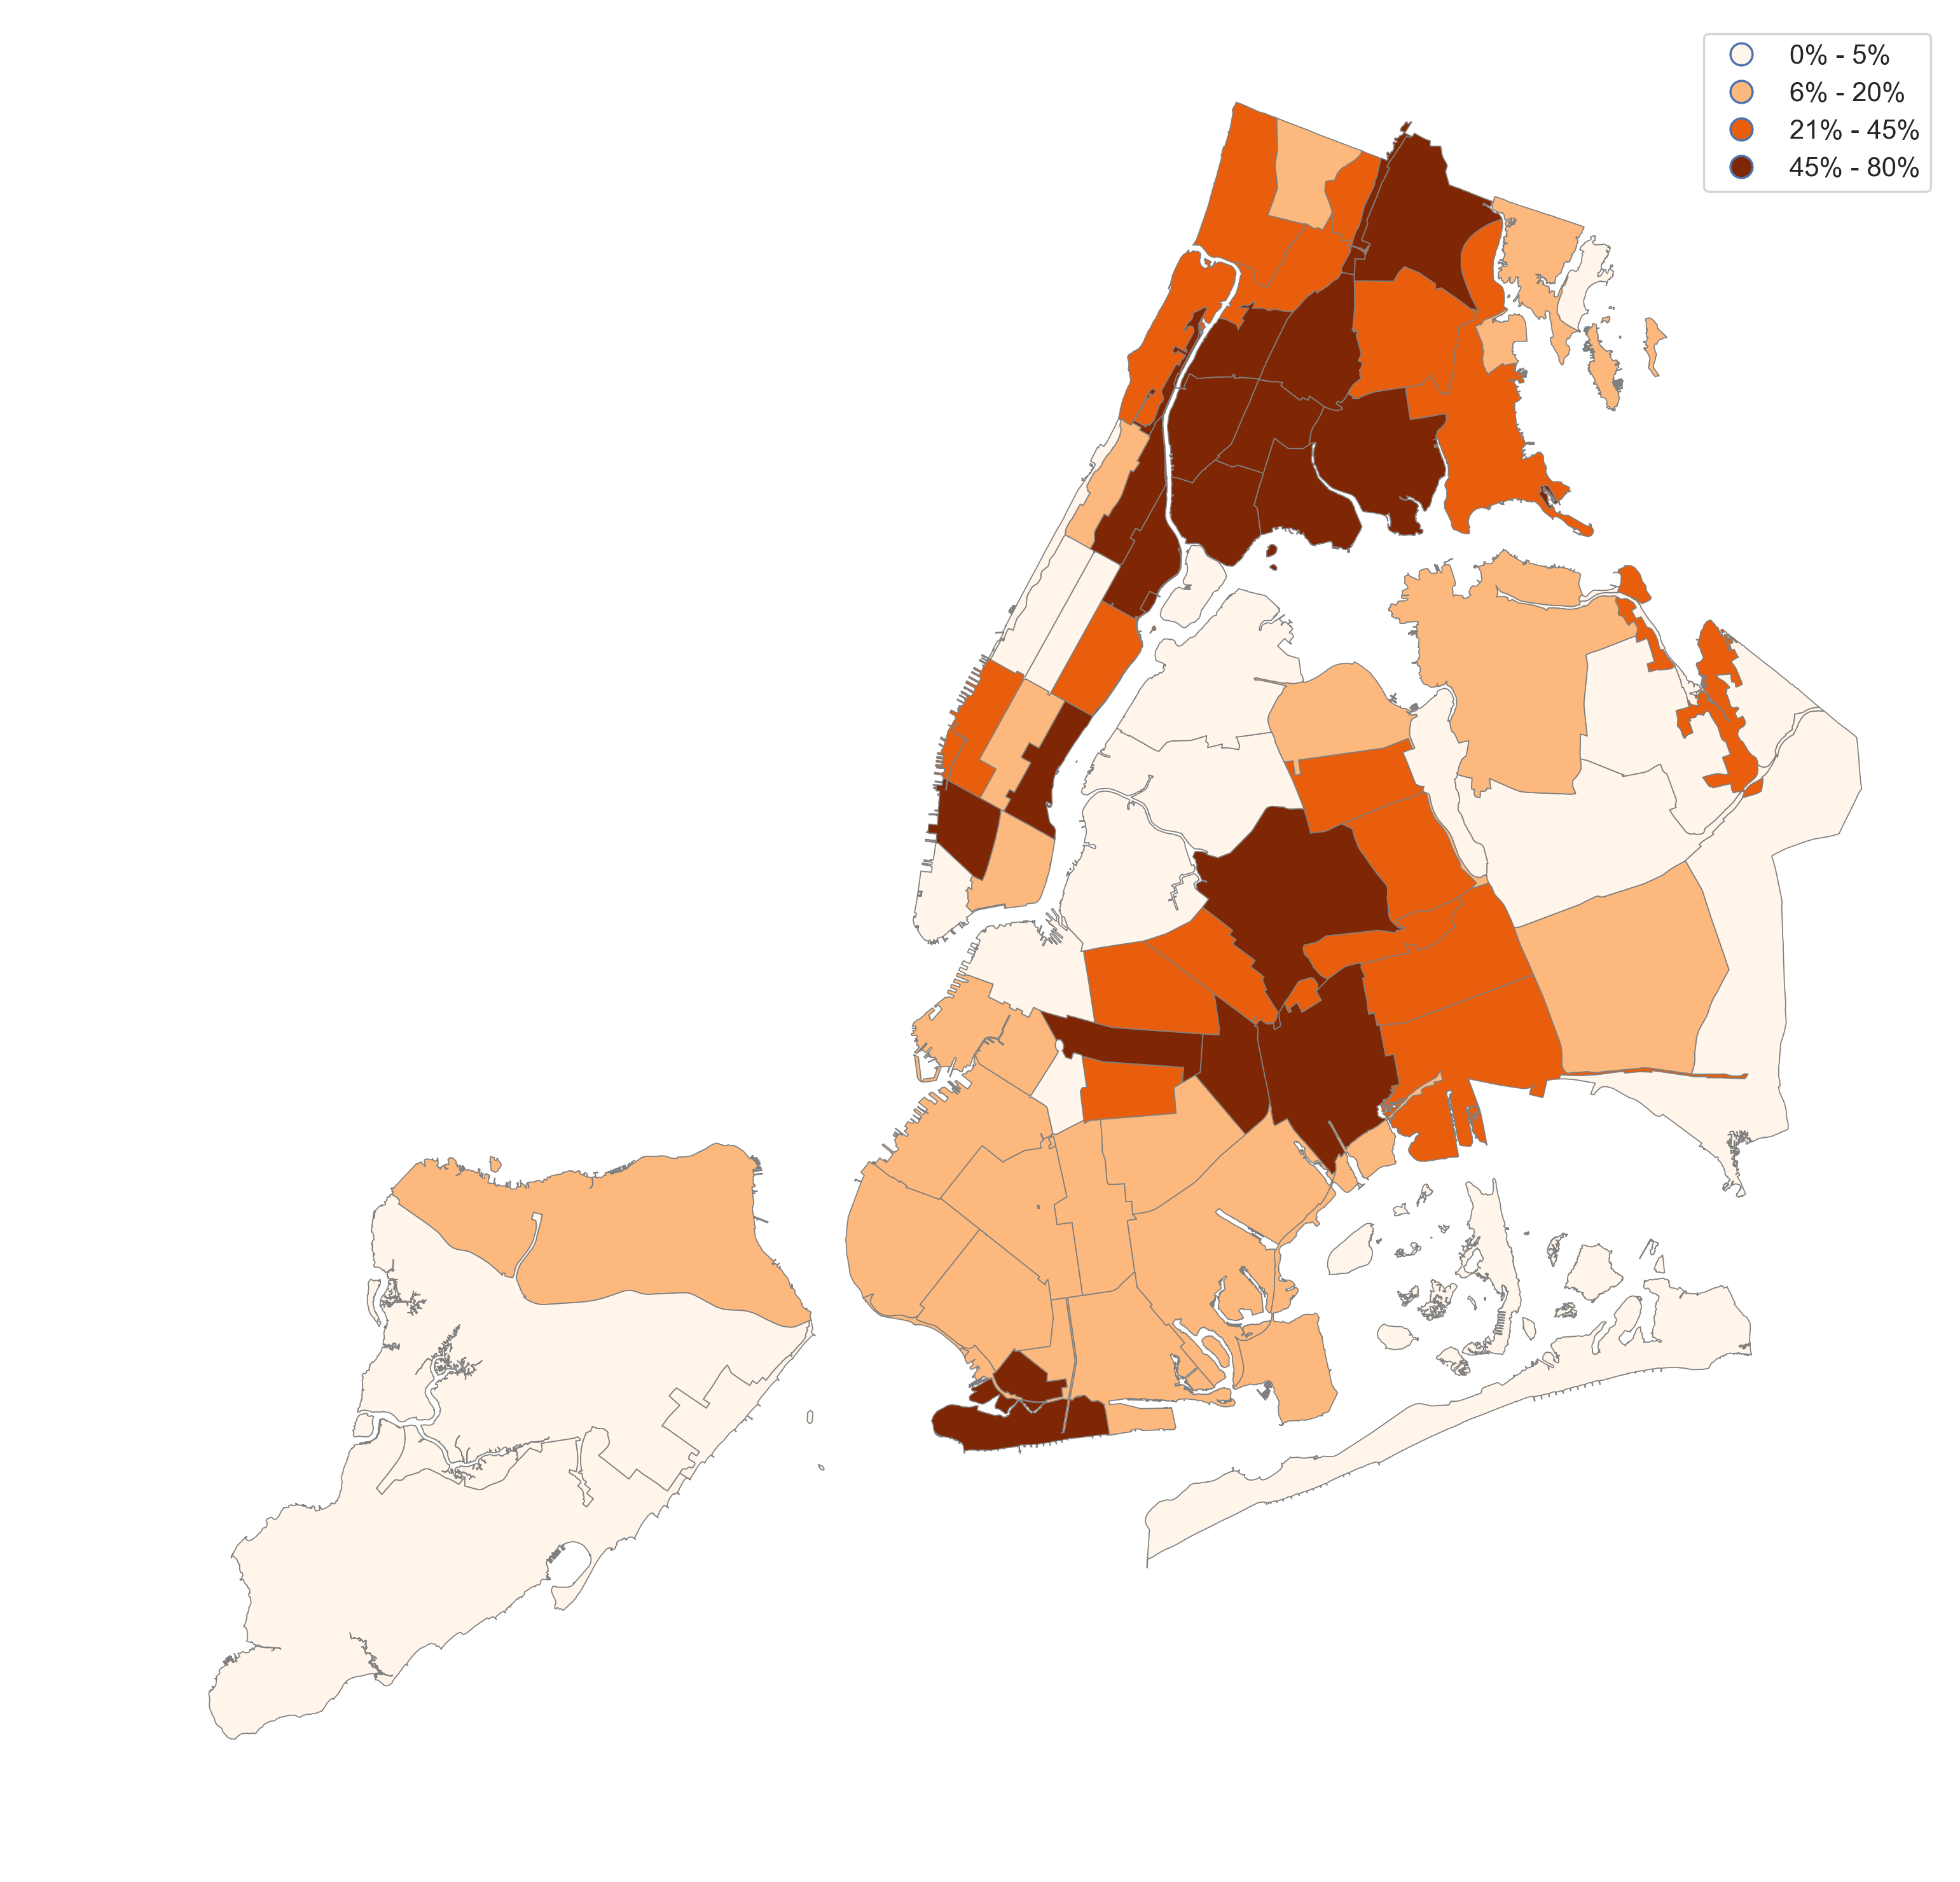

In [480]:
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
content_by_district_map.plot(ax=ax,column = 'animal_waste_0',scheme ='quantiles', k=4,cmap='Oranges',legend=True, 
                            linewidth=0.5, edgecolor='grey')

leg=ax.get_legend()
leg.get_texts()[0].set_text('0% - 5%')
leg.get_texts()[1].set_text('6% - 20%')
leg.get_texts()[2].set_text('21% - 45%')
leg.get_texts()[3].set_text('45% - 80%')

ax.axis('off')